# Chapter: Artificial Neural Networks


## Topic: FFNN-NARX-based Modeling of Heat Exchangers 

In [1]:
# import packages
import matplotlib.pyplot as plt, numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import ccf
from matplotlib.ticker import MaxNLocator

# package settings
plt.rcParams.update({'font.size': 14})

In [2]:
# random number seed for result reproducibility 
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(1)

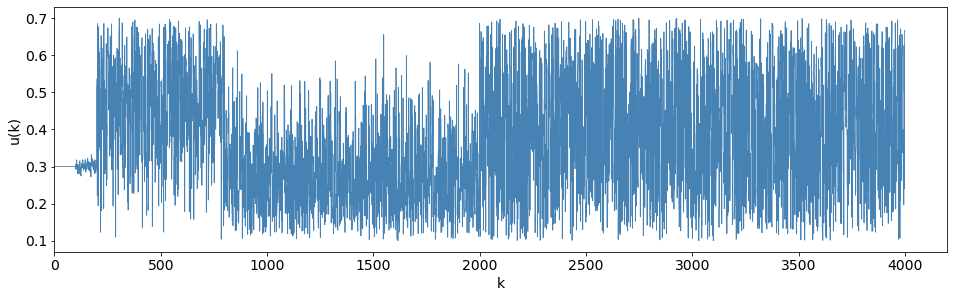

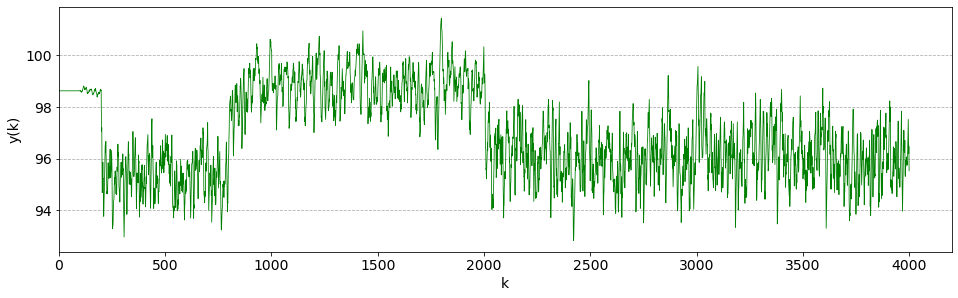

In [3]:
# read data and plot
data = np.loadtxt('exchanger.dat')
u = data[:,1, None]; y = data[:,2, None]

# plots
plt.figure(figsize=(16,4.5))
plt.plot(u, 'steelblue', linewidth=0.8, drawstyle='steps')
plt.ylabel('u(k)'), plt.xlabel('k'), plt.xlim(0)

plt.figure(figsize=(16,4.5))
plt.plot(y, 'g', linewidth=0.8)
plt.ylabel('y(k)'), plt.xlabel('k'), plt.xlim(0)
plt.grid(which='both', axis='y', linestyle='--')
plt.show()

In [4]:
# split into training and test dataset
u_fit = u[:3000,0:1]; u_test = u[3000:,0:1] 
y_fit = y[:3000,0:1]; y_test = y[3000:,0:1] 

In [5]:
# scale data before model fitting
u_scaler = StandardScaler(); u_fit_scaled = u_scaler.fit_transform(u_fit); u_test_scaled = u_scaler.transform(u_test) 
y_scaler = StandardScaler(); y_fit_scaled = y_scaler.fit_transform(y_fit); y_test_scaled = y_scaler.transform(y_test)

In [6]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                        Add lagged variables as regressors
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# rearrange u and y data into (# sequence samples, # lagged regressors) form
u_lags = 9; y_lags = 3
u_augument_fit_scaled = []
y_augment_fit_scaled = []

for sample in range(max(u_lags, y_lags), u_fit.shape[0]):
    row = np.hstack((u_fit_scaled[sample-u_lags:sample,0], y_fit_scaled[sample-y_lags:sample,0]))
    u_augument_fit_scaled.append(row)
    y_augment_fit_scaled.append(y_fit_scaled[sample])

# conversion: convert list into array 
u_augument_fit_scaled = np.array(u_augument_fit_scaled)
y_augment_fit_scaled = np.array(y_augment_fit_scaled)

In [7]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                          fit FFNN-NARX model
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [8]:
# import Keras libraries
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [9]:
# define model
model = Sequential()
model.add(Dense(14, activation='relu', kernel_initializer='he_normal', input_shape=(12,))) # 14 neurons in 1st hidden layer; this hidden layer accepts data from a 12 dimensional input
model.add(Dense(7, activation='relu', kernel_initializer='he_normal')) # 7 neurons in 2nd layer
model.add(Dense(1)) # output layer

# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                182       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 295
Trainable params: 295
Non-trainable params: 0
_________________________________________________________________


In [10]:
# compile and fit model
model.compile(loss='mse', optimizer='Adam') # mean-squared error is to be minimized
model.fit(u_augument_fit_scaled, y_augment_fit_scaled, epochs=250, batch_size=125)

Epoch 1/250
24/24 [==============================] - 0s 1ms/step - loss: 1.0289
Epoch 2/250
24/24 [==============================] - 0s 680us/step - loss: 0.6480
Epoch 3/250
24/24 [==============================] - 0s 1ms/step - loss: 0.4406
Epoch 4/250
24/24 [==============================] - 0s 679us/step - loss: 0.3132
Epoch 5/250
24/24 [==============================] - 0s 964us/step - loss: 0.2311
Epoch 6/250
24/24 [==============================] - 0s 681us/step - loss: 0.1794
Epoch 7/250
24/24 [==============================] - 0s 1ms/step - loss: 0.1480
Epoch 8/250
24/24 [==============================] - 0s 1ms/step - loss: 0.1276
Epoch 9/250
24/24 [==============================] - 0s 963us/step - loss: 0.1140
Epoch 10/250
24/24 [==============================] - 0s 681us/step - loss: 0.1045
Epoch 11/250
24/24 [==============================] - 0s 1ms/step - loss: 0.0976
Epoch 12/250
24/24 [==============================] - 0s 679us/step - loss: 0.0921
Epoch 13/250
24/24 [===

24/24 [==============================] - 0s 1ms/step - loss: 0.0440
Epoch 101/250
24/24 [==============================] - 0s 679us/step - loss: 0.0439
Epoch 102/250
24/24 [==============================] - 0s 963us/step - loss: 0.0438
Epoch 103/250
24/24 [==============================] - 0s 1ms/step - loss: 0.0438
Epoch 104/250
24/24 [==============================] - 0s 1ms/step - loss: 0.0439
Epoch 105/250
24/24 [==============================] - 0s 679us/step - loss: 0.0436
Epoch 106/250
24/24 [==============================] - 0s 964us/step - loss: 0.0436
Epoch 107/250
24/24 [==============================] - 0s 1ms/step - loss: 0.0437
Epoch 108/250
24/24 [==============================] - 0s 679us/step - loss: 0.0437
Epoch 109/250
24/24 [==============================] - 0s 1ms/step - loss: 0.0436
Epoch 110/250
24/24 [==============================] - 0s 964us/step - loss: 0.0435
Epoch 111/250
24/24 [==============================] - 0s 680us/step - loss: 0.0433
Epoch 112/250
24

24/24 [==============================] - 0s 680us/step - loss: 0.0400
Epoch 199/250
24/24 [==============================] - 0s 679us/step - loss: 0.0400
Epoch 200/250
24/24 [==============================] - 0s 1ms/step - loss: 0.0399
Epoch 201/250
24/24 [==============================] - 0s 677us/step - loss: 0.0398
Epoch 202/250
24/24 [==============================] - 0s 962us/step - loss: 0.0401
Epoch 203/250
24/24 [==============================] - 0s 680us/step - loss: 0.0400
Epoch 204/250
24/24 [==============================] - 0s 1ms/step - loss: 0.0399
Epoch 205/250
24/24 [==============================] - 0s 678us/step - loss: 0.0398
Epoch 206/250
24/24 [==============================] - 0s 680us/step - loss: 0.0398
Epoch 207/250
24/24 [==============================] - 0s 962us/step - loss: 0.0396
Epoch 208/250
24/24 [==============================] - 0s 678us/step - loss: 0.0397
Epoch 209/250
24/24 [==============================] - 0s 679us/step - loss: 0.0396
Epoch 210/

In [11]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                         Residual analysis on training dataset
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

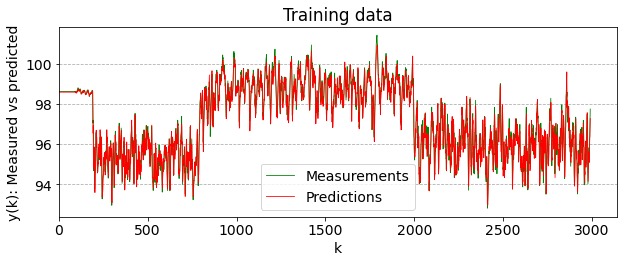

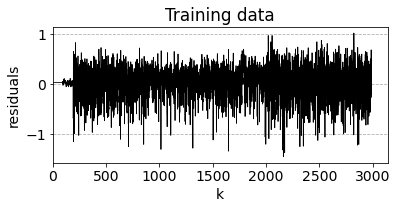

In [12]:
# get model (1-step ahead)  predictions and residuals on training dataset
y_augment_fit_scaled_pred = model.predict(u_augument_fit_scaled) 
y_augment_fit_pred =  y_scaler.inverse_transform(y_augment_fit_scaled_pred)
y_augment_fit = y_scaler.inverse_transform(y_augment_fit_scaled)
residuals_fit = y_augment_fit - y_augment_fit_pred

plt.figure(figsize=(10,3.5)), plt.plot(y_augment_fit, 'g', linewidth=0.8, label='Measurements'), plt.plot(y_augment_fit_pred, 'r', linewidth=0.8, label='Predictions')
plt.title('Training data'), plt.ylabel('y(k): Measured vs predicted'), plt.xlabel('k'), plt.legend(), plt.xlim(0)
plt.grid(which='both', axis='y', linestyle='--')

plt.figure(figsize=(6,2.5)), plt.plot(residuals_fit, 'black', linewidth=0.8)
plt.title('Training data'), plt.ylabel('residuals'), plt.xlabel('k'), plt.xlim(0)
plt.grid(which='both', axis='y', linestyle='--')
plt.show()

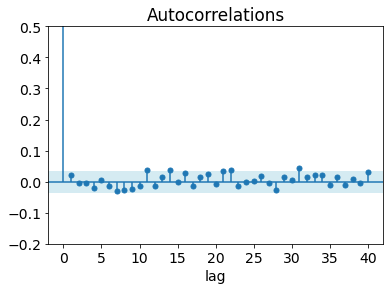

In [13]:
# ACF of residuals
conf_int = 1.96/np.sqrt(len(residuals_fit))

plot_acf(residuals_fit, lags= 40, alpha=None, title='')
plt.gca().axhspan(-conf_int, conf_int, facecolor='lightblue', alpha=0.5) # shaded confidence interval
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True)) # integer xtick labels
plt.xlabel('lag'), plt.title('Autocorrelations'), plt.ylim(-0.2, 0.5) 
plt.show()

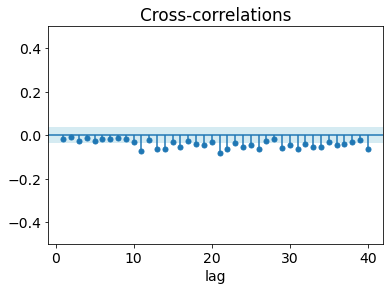

In [14]:
# CCF b/w residuals and input sequence
ccf_vals = ccf(residuals_fit, u_fit, adjusted=False) # ccf for lag > 0
ccf_vals = ccf_vals[1:41] # ccf for lag 1 to 20

# generate CCF plot
lags = np.arange(1,41)

plt.figure(figsize=(6,4)), plt.vlines(lags, [0], ccf_vals), plt.axhline(0, 0, lags[-1])
plt.plot(lags, ccf_vals, marker='o', markersize=5, linestyle='None')
plt.gca().axhspan(-conf_int, conf_int, facecolor='lightblue', alpha=0.5) # shaded confidence interval
plt.xlabel('lag'), plt.title('Cross-correlations')
plt.ylim(-0.5, 0.5)
plt.show()

In [15]:
#%% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##               m-step ahead predictions on test dataset
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [16]:
# for test dataset, rearrange u and y data into (# sequence samples, # lagged regressors) form
u_augument_test_scaled = []
y_augment_test_scaled = []

for sample in range(max(u_lags, y_lags), u_test.shape[0]):
    row = np.hstack((u_test_scaled[sample-u_lags:sample,0], y_test_scaled[sample-y_lags:sample,0]))
    u_augument_test_scaled.append(row)
    y_augment_test_scaled.append(y_test_scaled[sample])

# conversion: convert list into array 
u_augument_test_scaled = np.array(u_augument_test_scaled)
y_augment_test_scaled = np.array(y_augment_test_scaled)

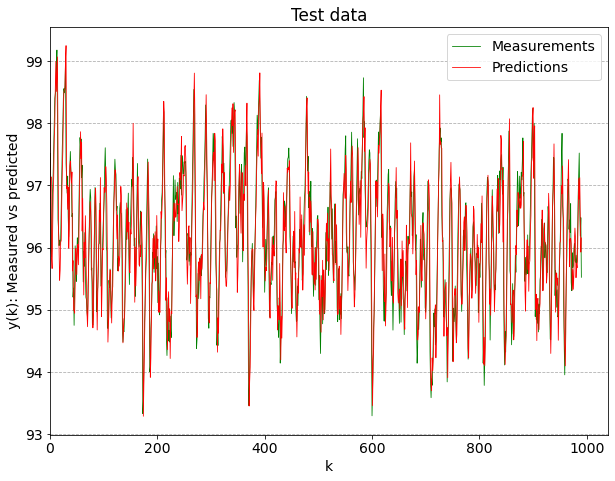

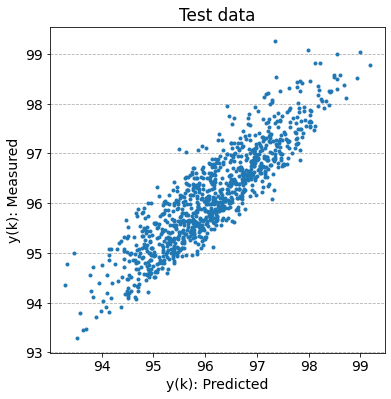

In [17]:
# 1-step ahead predictions
y_augment_test_scaled_pred = model.predict(u_augument_test_scaled) 
y_augment_test_pred =  y_scaler.inverse_transform(y_augment_test_scaled_pred)
y_augment_test = y_scaler.inverse_transform(y_augment_test_scaled)

plt.figure(figsize=(10,7.5)), plt.plot(y_augment_test, 'g', linewidth=0.8, label='Measurements'), plt.plot(y_augment_test_pred, 'r', linewidth=0.8, label='Predictions')
plt.title('Test data'), plt.ylabel('y(k): Measured vs predicted'), plt.xlabel('k'), plt.legend(), plt.xlim(0)
plt.grid(which='both', axis='y', linestyle='--')

plt.figure(figsize=(6,6)), plt.plot(y_augment_test, y_augment_test_pred, '.', linewidth=0.8)
plt.title('Test data'), plt.ylabel('y(k): Measured'), plt.xlabel('y(k): Predicted')
plt.grid(which='both', axis='y', linestyle='--')
plt.show()

In [18]:
# infinite-step ahead predictions [first u_lags samples are used as initial conditions]
y_augment_test_scaled_sim = np.copy(y_test_scaled)

for sample in range(u_lags,len(u_test),1):
    regressorVector = np.hstack((u_test_scaled[sample-u_lags:sample,0], y_augment_test_scaled_sim[sample-y_lags:sample,0]))
    regressorVector = regressorVector[None,:]
    sim_response = model.predict(regressorVector) 
    y_augment_test_scaled_sim[sample] = sim_response

y_augment_test_sim =  y_scaler.inverse_transform(y_augment_test_scaled_sim)

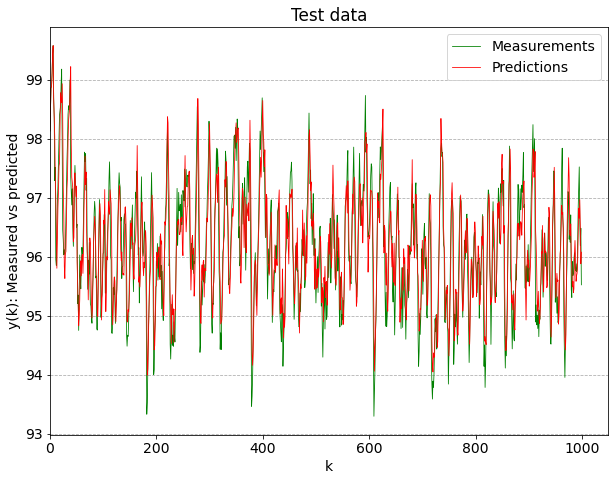

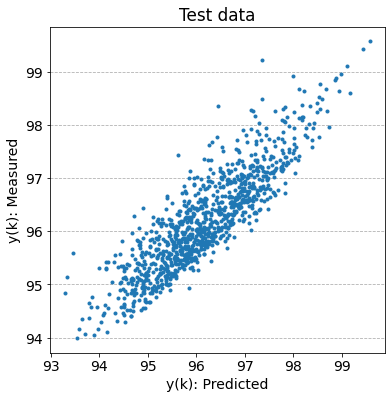

In [19]:
# plot
plt.figure(figsize=(10,7.5)), plt.plot(y_test, 'g', linewidth=0.8, label='Measurements'), plt.plot(y_augment_test_sim, 'r', linewidth=0.8, label='Predictions')
plt.title('Test data'), plt.ylabel('y(k): Measured vs predicted'), plt.xlabel('k'), plt.legend(), plt.xlim(0)
plt.grid(which='both', axis='y', linestyle='--')

plt.figure(figsize=(6,6)), plt.plot(y_test, y_augment_test_sim, '.', linewidth=0.8)
plt.title('Test data'), plt.ylabel('y(k): Measured'), plt.xlabel('y(k): Predicted')
plt.grid(which='both', axis='y', linestyle='--')